In [1]:
%matplotlib inline
from ipywidgets import interactive, fixed
import numpy as np
from matplotlib import pyplot as plt

## Entropy changes

By integrating the property relations, we can get explicit equations for entropy change between two points:

\begin{align}
T ds &= du + p dv \\
T ds &= c_v dT + p dv \\
ds &= c_v \frac{dT}{T} + \frac{p dv}{T}
\end{align}
Then, use the ideal gas equation of state: 
$$
p = \rho R T \rightarrow p v = R T \rightarrow \frac{p}{T} = \frac{R}{v}
$$
\begin{align}
ds &= c_v \frac{dT}{T} + R \frac{dv}{v} \\
\Delta s_{1-2} &= \int_{T_1}^{T_2} c_v (T) \frac{dT}{T} + R \int_{v_1}^{v_2} \frac{dv}{v} \\
\text{if } c_v(T) &= c_v,  \\
\therefore \Delta s_{1-2} &= c_v \ln \frac{T_2}{T_1} + R \ln \frac{v_2}{v_1}
\end{align}

Similarly, we can take that expression and obtain
\begin{align}
\Delta s_{1-2} &= c_p \ln \frac{v_2}{v_1} + c_v \ln \frac{p_2}{p_1} \\
\Delta s_{1-2} &= c_p \ln \frac{T_2}{T_1} - R \ln \frac{p_2}{p_1}
\end{align}

In [11]:
# Use properties of air
R = 287. # N*m/kg*K
c_v = 716.  # J/kg*K
c_p = 1000. # J/kg*K
gamma = c_p / c_v
def get_entropy_t_v(T1, T2, v1, v2):
    """Calculate entropy change given temperature and volume.
    """
    return c_v * np.log(T2 / T1) + R * np.log(v2 / v1)

def get_entropy_v_p(v1, v2, p2, p1):
    """Calculate entropy change given volume and pressure.
    """
    return c_p * np.log(v2 / v1) + c_v * np.log(p2 / p1)

def get_entropy_t_p(T1, T2, p1, p2):
    """Calculate entropy change given temperature and pressure.
    """
    return c_p * np.log(T2 / T1) - R * np.log(p2 / p1)


## Processes: polytropic

Polytropic processes follow the relation 

$$
p v^n = \text{const} = C_1 ,
$$

where $n$ is the polytropic constant that depends on the specific process. With the ideal gas equation of state, we can also get relations with temperature:

\begin{align}
T v^{n-1} & = C_2 \\
T p^{\frac{1-n}{n}} & = C_3
\end{align}

where $C_1$, $C_2$, and $C_3$ are different constants.

Different values of $n$ correspond to different (polytropic) processes:

 - isobaric: $p = \text{const} \rightarrow n = 0$
 - isothermal: $T = \text{const} \rightarrow n = 1$
 - isentropic: $s = \text{const} \rightarrow n = \gamma$
 - isochoric: $v = \text{const} \rightarrow n = \infty$
 
Let's visualize the $p-v$ diagrams for each of these processes:

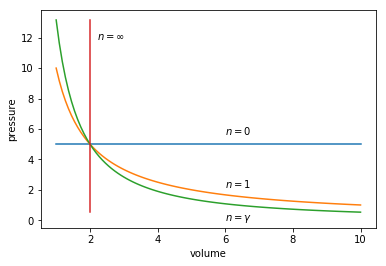

In [12]:
# For a range of volumes, calculate pressure for various processes using a given pressure-volume combination.
pressure_start = 5.0
volume_start = 2.0; volume_end = 10.0;
volume = np.linspace(1.0, volume_end, num=100)

const_isobaric = pressure_start * volume_start**0
pressure_isobaric = const_isobaric / volume**0

const_isothermal = pressure_start * volume_start**1.0
pressure_isothermal = const_isothermal / volume**1.0

const_isentropic = pressure_start * volume_start**gamma
pressure_isentropic = const_isentropic / volume**gamma

# isochoric is a bit different
pressure_isochoric = np.linspace(np.min(pressure_isentropic), np.max(pressure_isentropic), num=100)
volume_isochoric = np.ones_like(pressure_isochoric) * volume_start

# Now, plot everything:
plt.plot(volume, pressure_isobaric);
plt.text(volume_end*0.6, np.max(pressure_isobaric)*1.1, r'$n = 0$', verticalalignment='bottom');
plt.plot(volume, pressure_isothermal);
plt.text(volume_end*0.6, np.min(pressure_isothermal)*2, r'$n = 1$', verticalalignment='bottom');
plt.plot(volume, pressure_isentropic);
plt.text(volume_end*0.6, np.min(pressure_isentropic)*0.9, r'$n = \gamma$', verticalalignment='top');
plt.plot(volume_isochoric, pressure_isochoric);
plt.text(volume_start*1.1, max(pressure_isochoric)*0.9, r'$n = \infty$', horizontalalignment='left');
plt.xlabel('volume'); plt.ylabel('pressure');
plt.ylim(ymin=-0.5);

Using our relations for entropy changes, we can also visualize the $T-s$ diagrams for these processes:

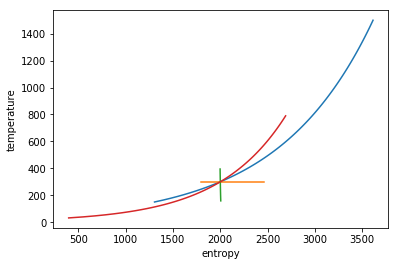

In [18]:
temperature_start = 300.
entropy_start = 2000.

const_isobaric = temperature_start * volume_start**(-1)
temperature_isobaric = const_isobaric / volume**(-1)
entropy_isobaric = entropy_start + get_entropy_t_v(temperature_start, temperature_isobaric, volume_start, volume)

temperature_isothermal = temperature_start * np.ones_like(volume)
entropy_isothermal = entropy_start + get_entropy_t_v(temperature_start, temperature_isothermal, volume_start, volume)

# The limit of (1-n)/n as n-> infinity is -1
const_isochoric = temperature_start * pressure_start**(-1)
temperature_isochoric = const_isochoric / pressure_isochoric**(-1)
entropy_isochoric = entropy_start + get_entropy_t_p(temperature_start, temperature_isochoric, pressure_start, pressure_isochoric)

# isentropic is a bit different
const_isentropic = temperature_start * volume_start**(gamma - 1)
temperature_isentropic = const_isentropic / volume**(gamma - 1)
entropy_isentropic = entropy_start + get_entropy_t_v(temperature_start, temperature_isentropic, volume_start, volume)

# Now, plot everything:
plt.plot(entropy_isobaric, temperature_isobaric);
#plt.text(volume_end*0.6, np.max(pressure_isobaric)*1.1, r'$n = 0$', verticalalignment='bottom');
plt.plot(entropy_isothermal, temperature_isothermal);
#plt.text(volume_end*0.6, np.min(pressure_isothermal)*2, r'$n = 1$', verticalalignment='bottom');
plt.plot(entropy_isentropic, temperature_isentropic);
#plt.text(volume_end*0.6, np.min(pressure_isentropic)*0.9, r'$n = \gamma$', verticalalignment='top');
plt.plot(entropy_isochoric, temperature_isochoric);
#plt.text(volume_start*1.1, max(pressure_isochoric)*0.9, r'$n = \infty$', horizontalalignment='left');
plt.xlabel('entropy'); plt.ylabel('temperature');
#plt.ylim(ymin=-0.5);